In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler(f, t0, x0, b, h = 0.001):
    n = int((b - t0[0]) / h)
    t = np.empty((n+1, 2))
    x = np.empty((n+1, 2))
    t[0] = t0
    x[0] = x0
    for i in range(1, n+1):
        x[i] = x[i-1] + h * f(t[i-1], x[i-1])
        t[i] = t[i-1] + h
    return t, x


def none_euler(f, t0, x0, b, coefs, h = 0.01):
    n = int((b - t0[0]) / h)
    t = np.zeros((n+1, 2))
    x = np.zeros((n+1, 2))
    t[0] = t0
    x[0] = x0
    I = np.array([[1, 0], [0, 1]])
    for i in range(1, n+1):
        x[i] = np.linalg.inv(I - h/2*coefs).dot(I + h/2*coefs).dot(x[i-1])
        t[i] = t[i-1] + h
    return t, x


def f(t, x, a=998, b=1998, c=-999, d=-1999):
    return np.array((a*x[0] + b*x[1], c*x[0] + d*x[1]))

def real_sol(t):
    return np.array([4*np.exp(-t)-3*np.exp(-1000*t), -2*np.exp(-t)+3*np.exp(-1000*t)])

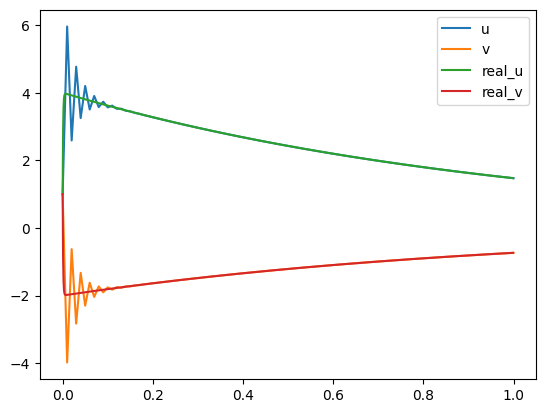

In [3]:
coefs = np.array([[998, 1998], [-999 ,-1999]])
b = 1
t, x = none_euler(f, x0=np.array([1,1]), t0=[0,0], b=b, coefs=coefs, h=0.01)
t_real = np.arange(0, b, 0.001)
real_U_V = real_sol(t_real)
plt.plot(np.stack(t, axis=1)[0], np.stack(x, axis=1)[0], label="u")
plt.plot(np.stack(t, axis=1)[0], np.stack(x, axis=1)[1], label="v")
plt.plot(t_real, real_U_V[0], label="real_u")
plt.plot(t_real, real_U_V[1], label="real_v")
plt.plot()
plt.legend()
plt.show()

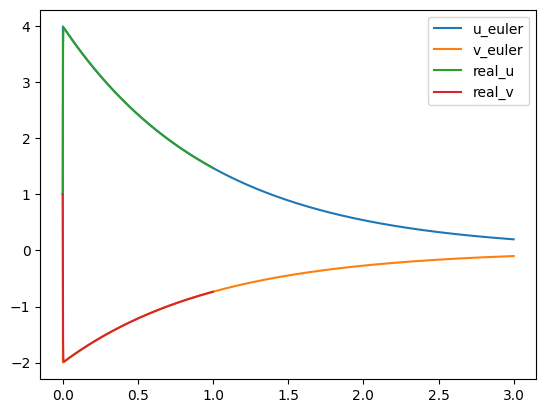

In [4]:
t_e, x_e = euler(f, x0=np.array([1,1]), t0=[0,0], b=3, h=0.001)
plt.plot(np.stack(t_e, axis=1)[0], np.stack(x_e, axis=1)[0], label="u_euler")
plt.plot(np.stack(t_e, axis=1)[0], np.stack(x_e, axis=1)[1], label="v_euler")
plt.plot(t_real, real_U_V[0], label="real_u")
plt.plot(t_real, real_U_V[1], label="real_v")
plt.legend()
plt.show()